In [149]:
import klimadata
import plot
from pyextremes import EVA
import pyextremes
import klimadata
import requests
import pandas as pd
import datetime
import plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [164]:
parameterliste_døgn = ['rr', 'tm', 'sd', 'fsw', 'sdfsw', 'sdfsw3d']
parameterliste_3h = ['rr3h', 'tm3h', 'windDirection10m3h', 'windSpeed10m3h']
start_3h = '2019-07-29'
start3h_dato = datetime.datetime(int(start_3h[0:4]), int(start_3h[5:7]), int(start_3h[8:10]))
slutt_3h = '2019-08-02'
lon = '6849673.21'
lat= '27447.76'
startdato = '1958-01-01'
sluttdato = '2021-12-31'
plottype = 'Klimaoversikt med 3 døgn snø og returverdi'
annotert = True
vind = True
lon = int(float(lon.strip()))
lat = int(float(lat.strip()))
antall_dager = 3

In [165]:
sluttdato_berekna = start3h_dato + datetime.timedelta(days=antall_dager)
print(sluttdato_berekna)
print(str(sluttdato_berekna)[0:10])

2019-08-01 00:00:00
2019-08-01


In [166]:
def nve_api(lat, lon, startdato, sluttdato, para):
    """Henter data frå NVE api GridTimeSeries
    Args:
        lat (str): øst-vest koordinat (i UTM33)
        output er verdien i ei liste, men verdi per dag, typ ne
        lon (str): nord-sør koordinat (i UTM33)
        startdato (str): startdato for dataserien som hentes ned
        sluttdato (str): sluttdato for dataserien som hentes ned
        para (str): kva parameter som skal hentes ned f.eks rr for nedbør
        
    Returns:
        verdier (liste) : returnerer i liste med klimaverdier
        
    """
    api = 'http://h-web02.nve.no:8080/api/'
    url = api + '/GridTimeSeries/' + str(lat) + '/' + str(lon) + '/' + str(startdato) + '/' + str(sluttdato) + '/' + para + '.json'
    r = requests.get(url)

    verdier = r.json()
    return verdier

In [167]:
def klima_dataframe3h(lat, lon, startdato, sluttdato, parametere):
    parameterdict = {}
    for parameter in parametere:
        api_svar = nve_api(lat, lon, startdato, sluttdato, parameter)
        parameterdict[parameter] = api_svar['Data']
        altitude = api_svar['Altitude']
     
    df = pd.DataFrame(parameterdict)
    df = df.set_index(pd.date_range(
        datetime.datetime(int(startdato[0:4]), int(startdato[5:7]), int(startdato[8:10])),
        datetime.datetime(int(sluttdato[0:4]), int(sluttdato[5:7]), int(sluttdato[8:10])), freq='3h')
    )
    df[df > 1000] = 0
    return df, altitude

In [168]:
df, altitude = klima_dataframe3h(lat, lon, start_3h, slutt_3h, parameterliste_3h)
df

,rr3h,tm3h,windDirection10m3h,windSpeed10m3h
2019-07-29 00:00:00,0.0,19.65,3,3.3
2019-07-29 03:00:00,0.0,17.75,3,3.4
2019-07-29 06:00:00,0.0,19.15,3,3.8
2019-07-29 09:00:00,0.0,24.75,3,3.5
2019-07-29 12:00:00,0.0,26.35,1,1.6
2019-07-29 15:00:00,2.3,23.95,1,1.9
2019-07-29 18:00:00,0.7,21.65,5,2.5
2019-07-29 21:00:00,0.0,19.55,2,1.5
2019-07-30 00:00:00,0.0,17.55,2,4.0
2019-07-30 03:00:00,0.0,16.05,2,2.8


In [169]:
df['u'] = df['windDirection10m3h']

<AxesSubplot: >

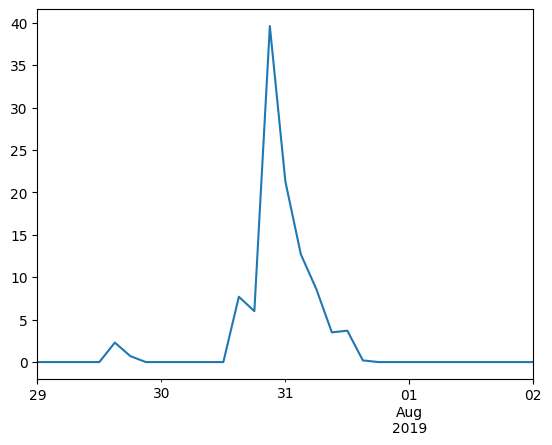

In [170]:
df['rr3h'].plot()

Text(0, 0.5, 'Temperatur (°C)')

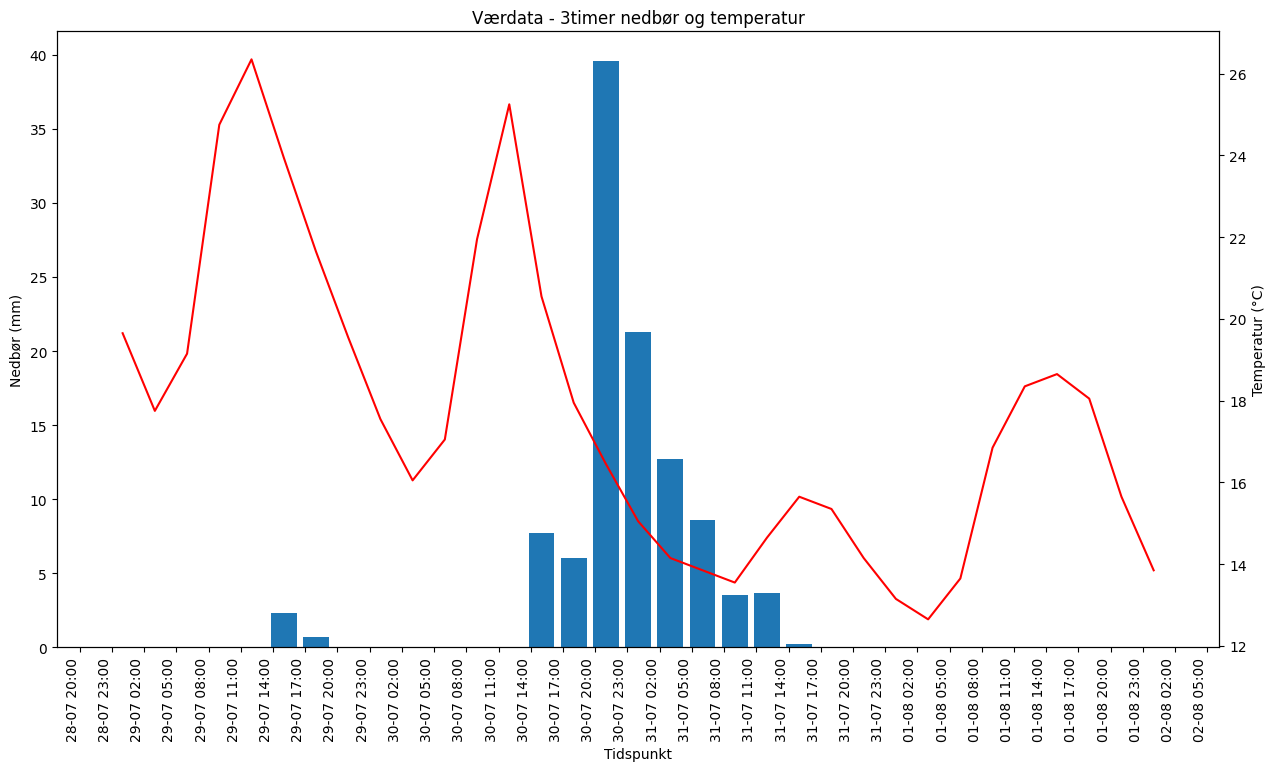

In [171]:
fig = plt.figure(figsize=(15,8)) 
ax1 = fig.add_subplot(111)
ax1.set_title('Værdata - 3timer nedbør og temperatur')
ax1.bar(df.index,  df['rr3h'], width=0.100)
ax1.set_xlabel('Tidspunkt')
ax1.set_ylabel('Nedbør (mm)')
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))   
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=90, ha='right')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M')) 

ax2 = ax1.twinx()
ax2.plot(df.index, df['tm3h'], 'r', label='Temperatur ')
ax2.set_ylabel('Temperatur (\u00B0C)')

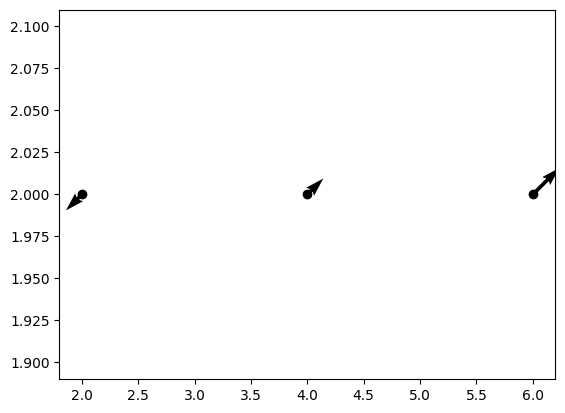

In [138]:
x=[2,4,6]
y=[2,2,2]
u=[-6,6,10]
v=[-6,6,10]
fig2, ax10 = plt.subplots()
ax10.quiver(x,y,u,v)
ax10.scatter(x,y,color='k')
#ax.axis([0,10,0,10])